In [50]:
import pandas as pd

In [51]:
# import date set

df = pd.read_csv(r'C:\My data\Portfolio\Python\Income Prediction Machine Learning\Income.csv')

In [52]:
# checking data

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [54]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [55]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [56]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [57]:
# Convert occupation, workclass, marital-status, relationship, race, native-country values to binery for machine learning
# which is more efficient for decision tree 
# withdraw education because we have educational-num

df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)

In [58]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# Convert gender and income values to binery for machine learning

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [60]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,0,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,1,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

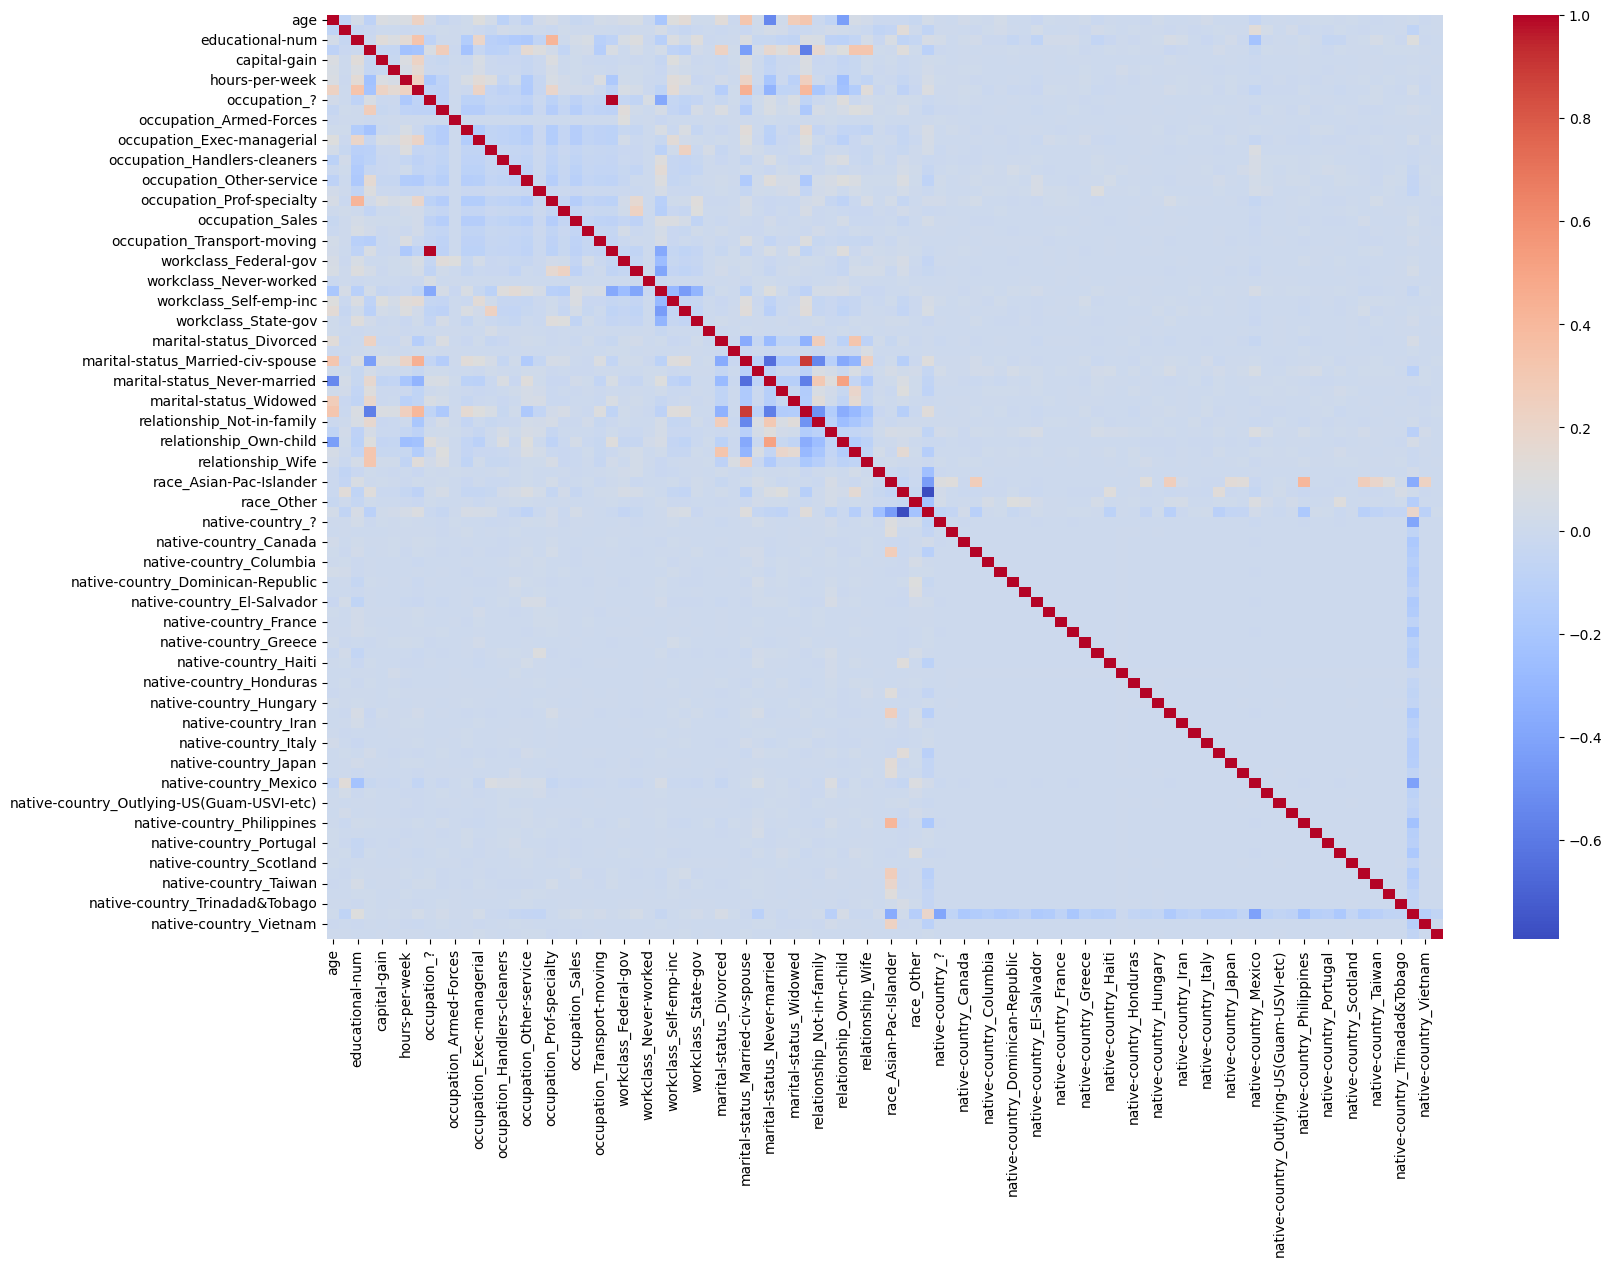

In [62]:
# Figure the correlation between different parameters

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

In [67]:
# as the heatmap was too messy because of the number of parameters(columns), try to keep just 20% most 
# correlation parameters with income



correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [69]:
df_dropped.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,0,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,0,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,0,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,0,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,1,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

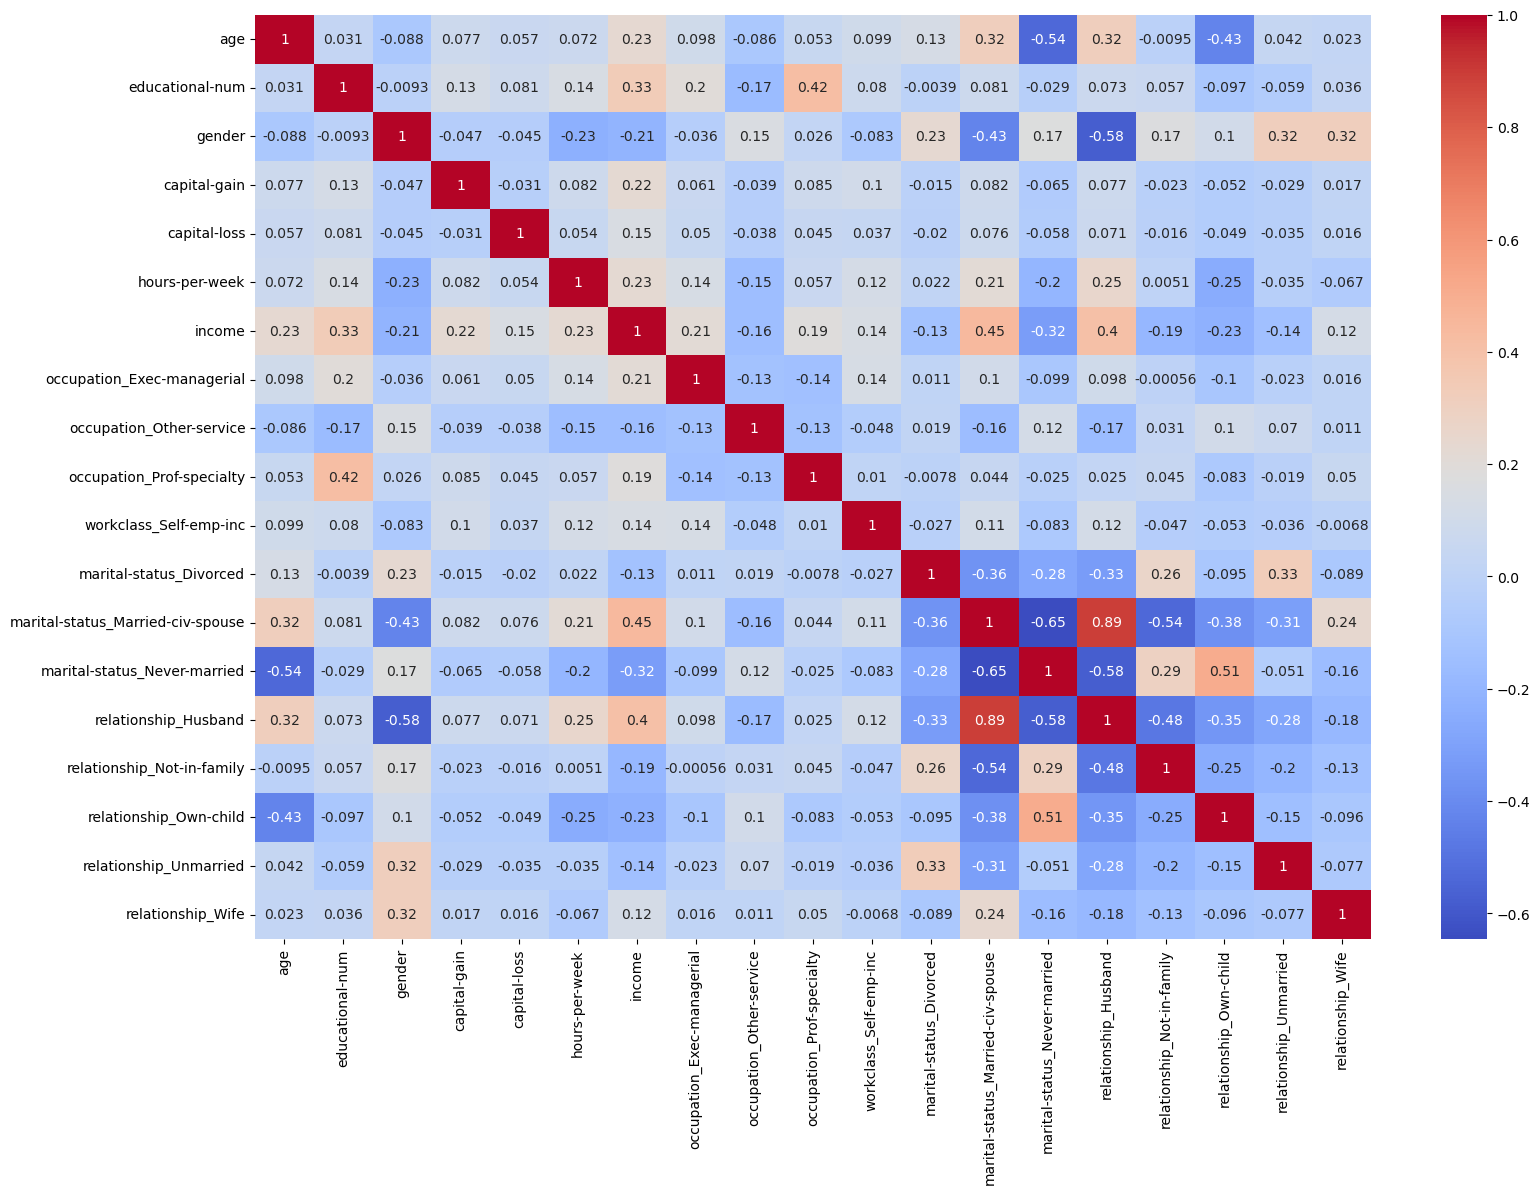

In [71]:
plt.figure(figsize = (18, 12))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm')

In [89]:
# Starting machine learning


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [90]:
num_row_train = train_df.shape[0]
num_row

39073

In [91]:
num_row_test = test_df.shape[0]
num_row_test

9769

In [92]:
train_X = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_X = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [93]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [94]:
# Accuracy of the predictor 

forest.score(test_X, test_y)

0.8466577950660252

In [95]:
forest.feature_importances_

array([2.29434335e-01, 1.34322075e-01, 1.35695461e-02, 1.05422843e-01,
       3.71768813e-02, 1.12880206e-01, 1.58827585e-03, 5.03874383e-03,
       1.15452564e-04, 5.97703291e-03, 2.13462010e-02, 4.38532292e-03,
       3.32689138e-03, 3.89561679e-03, 8.41973429e-03, 1.72491678e-04,
       1.79180942e-02, 2.81263617e-03, 6.33786155e-03, 4.39692214e-03,
       4.20159918e-03, 1.66876479e-03, 5.30927236e-03, 5.72336954e-03,
       3.03838762e-06, 9.44537211e-03, 6.47283366e-03, 8.12793659e-03,
       4.25042077e-03, 1.19341114e-04, 5.86229741e-03, 3.84861257e-04,
       7.29768560e-02, 1.10543287e-03, 2.70582163e-02, 2.01080262e-03,
       2.05837206e-03, 4.26884007e-02, 1.25775799e-02, 1.61839833e-03,
       9.11663353e-03, 6.49600885e-03, 8.23126949e-03, 1.44676828e-03,
       2.96209089e-03, 4.91660526e-03, 9.19791846e-04, 6.20191744e-03,
       2.91423306e-03, 1.83610405e-04, 1.36724879e-03, 5.91922954e-04,
       2.58589406e-04, 7.57490721e-04, 3.13077726e-04, 1.83959990e-04,
      

In [96]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [97]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),key = lambda x: x[1], reverse = True)}



In [98]:
importances

{'age': 0.22943433513305786,
 'educational-num': 0.13432207450248018,
 'hours-per-week': 0.11288020624931752,
 'capital-gain': 0.10542284312875645,
 'marital-status_Married-civ-spouse': 0.07297685599294723,
 'relationship_Husband': 0.042688400682531,
 'capital-loss': 0.03717688130229108,
 'marital-status_Never-married': 0.027058216277787234,
 'occupation_Exec-managerial': 0.021346201044403268,
 'occupation_Prof-specialty': 0.01791809419158491,
 'gender': 0.013569546072152902,
 'relationship_Not-in-family': 0.012577579879214037,
 'workclass_Private': 0.009445372114939498,
 'relationship_Own-child': 0.009116633531145085,
 'occupation_Other-service': 0.008419734293282684,
 'relationship_Wife': 0.00823126949202837,
 'workclass_Self-emp-not-inc': 0.008127936590460603,
 'relationship_Unmarried': 0.006496008846261126,
 'workclass_Self-emp-inc': 0.006472833663068613,
 'occupation_Sales': 0.00633786155256258,
 'race_White': 0.006201917436553499,
 'native-country_United-States': 0.00604460342908

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']    
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                          param_grid = param_grid, verbose = 10)

In [104]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.851 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.6s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.6s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.814 total time=   1.8s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.822 total time=   1.6s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.821 total time=   1.6s
[CV 4/5; 9/48] START max_d

[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.6s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.865 total time=   0.6s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.6s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.860 total time=   1.3s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100
[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.859 total time=   1.3s
[CV 3/5; 17/4

[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   2.7s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   2.7s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   2.6s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.861 total time=   2.7s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250
[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.852 total time=   2.6s
[CV 1/5;

[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.863 total time=   1.2s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.860 total time=   1.2s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   2.5s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   2.7s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.861 total time=   2.5s
[CV 4/5; 32

[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.843 total time=   8.1s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=   7.9s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=   8.1s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.848 total time=   8.5s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.853 total time=

[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.856 total time=   1.4s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   2.7s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.846 total time=   2.8s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   2.7s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.859 total time

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [105]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [106]:
# Accuracy of the predictor

forest = grid_search.best_estimator_

forest.score(test_X, test_y)

0.8603746545193981

In [107]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),key = lambda x: x[1], reverse = True)}

In [108]:
importances

{'age': 0.15102751959826097,
 'capital-gain': 0.13688382926138962,
 'educational-num': 0.13145642740424612,
 'hours-per-week': 0.08902291888676236,
 'marital-status_Married-civ-spouse': 0.08571133485558845,
 'relationship_Husband': 0.06309637786310052,
 'capital-loss': 0.04454774895975286,
 'marital-status_Never-married': 0.03279771450124458,
 'occupation_Exec-managerial': 0.0282829820877736,
 'occupation_Prof-specialty': 0.021827813423092472,
 'relationship_Not-in-family': 0.014659696175143394,
 'gender': 0.01413043292482914,
 'relationship_Wife': 0.01330438790142377,
 'relationship_Own-child': 0.011952408223109579,
 'occupation_Other-service': 0.00968478167469351,
 'workclass_Self-emp-not-inc': 0.009237501305416087,
 'workclass_Private': 0.008670993701079138,
 'marital-status_Divorced': 0.008521026550815547,
 'relationship_Unmarried': 0.007058240197449012,
 'workclass_Self-emp-inc': 0.0067785722700576,
 'native-country_United-States': 0.006097050631721654,
 'occupation_Sales': 0.0060